# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Необходимо:

-Выполнить предобработку данных

-Добавить в таблицу новые столбцы

-Провести EDA

-Вынести ключевые выводы и результаты работы

## Откроем файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Выведем гистограмму нашего датасета
**Для наглядности распределения данных по каждому столбцу и общую информацию по данным.**

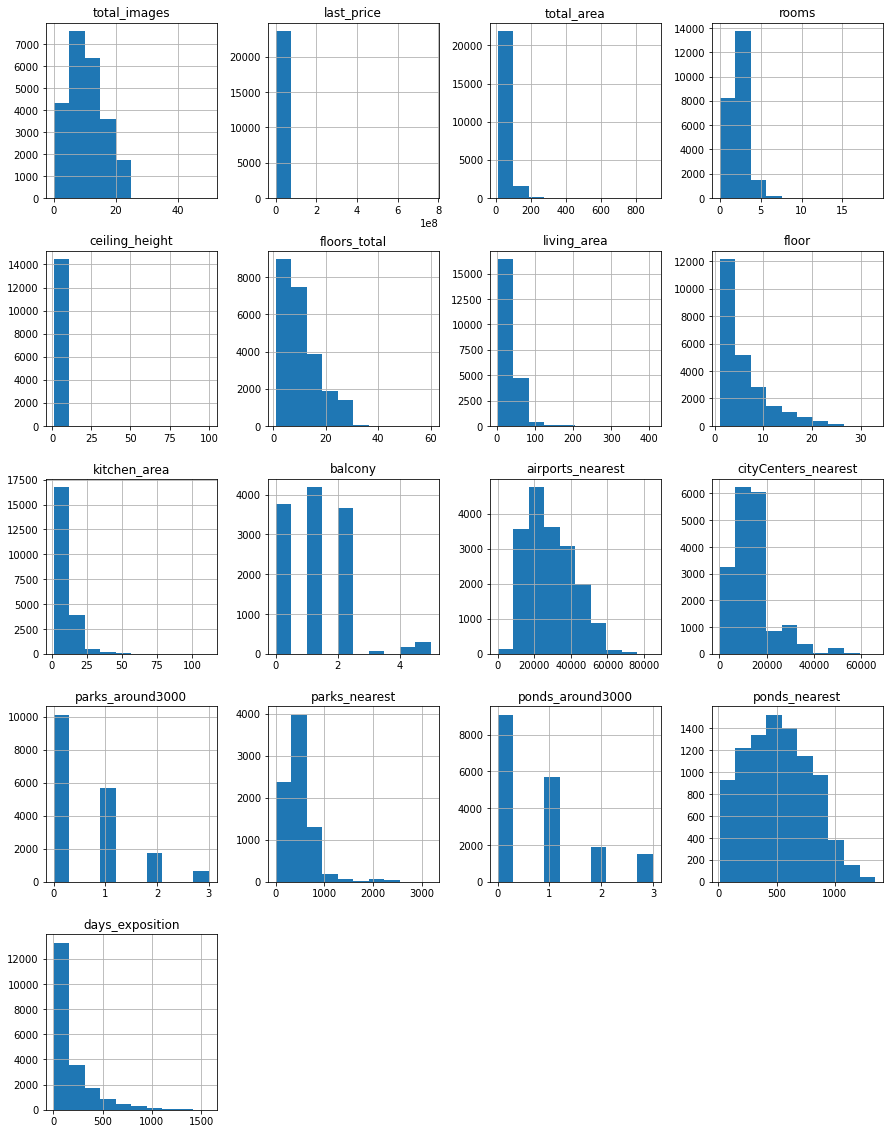

In [ ]:
columns_hist = df.hist(figsize=(15, 20))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод  по общей информации:
**Видим что большая часть распределений имеет "длинные хвосты" что отражает присутствие в этих данных аномальных значений. В данных 23699 строк. Имеются типы данных вида: bool(2), float64(14), int64(3), object(3)**

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть, план намечен.

## Предобработка данных

### Проверим наличие пропущенных значений в нашем датасете

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Наблюдаем в данной сводной таблице наличие пропусков и пытаемся заполнить их там где это возможно**

In [ ]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**Вывод: Выискиваем уникальные значение в колнке "ceiling_height", наблюдаем выбросы в данных. Они будут влиять на среднее значение по переменной, я это делал что бы дать обоснование почему я эти пропуски и последующие буду заполнять медианной а не средним ибо медианна меньше подвержанна выбросам и будет рациональней отражать действительность.**

### Выявив аномальные значения в колонке "celling_height"
**Приведем пропуски данных к медиане, для корректного заполнения**

In [ ]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

**Заполнили пустые значения в колонке, что и видим методами isna().mean()**

In [ ]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

### Пропуски в "floors_total"

In [ ]:
df['floors_total'].isna().sum()

86

<div class="alert alert-info">
    
**Заменять пропуски каким либо значением не логично т.к. отсутствуют данные на которые можно было бы оперется при заполнении пропусков**</div>

<div class="alert alert-info">
    
**Так как пропусков в floors_total 0.3% от всего df удаляю их что бы было возможно приведение этого столбца к целочисленному типу данных для дальнейшей работы с ним**</div>

In [ ]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True)

In [ ]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.079194
floor                   0.000000
is_apartment            0.882480
studio                  0.000000
open_plan               0.000000
kitchen_area            0.094482
balcony                 0.486173
locality_name           0.002033
airports_nearest        0.234278
cityCenters_nearest     0.233304
parks_around3000        0.233261
parks_nearest           0.659298
ponds_around3000        0.233261
ponds_nearest           0.616271
days_exposition         0.134333
dtype: float64

In [ ]:
df['floors_total'].dtype

dtype('float64')

#### Приведем тип данных к int, тк логически представлять количество этажей целочисленным типом данных

In [ ]:
df['floors_total'] = df['floors_total'].astype(int)
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

### Приведем тип данных к int во "Floor"

In [ ]:
df['floor'] = df['floor'].astype(int)
df['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

### Заполнение пропусков в "living_area"

**Гипотезa в "living_area"**

**О том, что площадь кухни в квартире имеет зависимость с общей площадью квартиры.**

In [ ]:
df['living_area'].corr(df['total_area'])


0.9397704889780097

**Так как мы наблюдаем корреляцию, то пропуски в "living_area" заполняем относительно "total_area"**

#### Разбиваю необходимые нам количественные переменные
**на категории для построения сводных таблиц, по которым создаю функцию для заполнения пропусков в "living_area"**

In [ ]:
df['living_area_category'] = pd.qcut(df['living_area'], 5)
df['total_area_category'] = pd.qcut(df['total_area'], 5)
df.groupby('total_area_category')['total_area'].agg(['count', 'mean','median'])

,count,mean,median
total_area_category,,,
"(11.999, 37.6]",4733,32.555542,33.00
"(37.6, 46.0]",4962,42.275143,42.30
"(46.0, 58.0]",4563,52.377690,52.39
"(58.0, 74.9]",4635,65.491786,65.00
"(74.9, 900.0]",4720,109.833892,93.49


In [ ]:
df.groupby('living_area_category')['living_area'].agg(['count', 'mean','median'])

,count,mean,median
living_area_category,,,
"(1.999, 18.0]",4991,16.303154,16.9
"(18.0, 27.5]",3716,22.000202,20.5
"(27.5, 33.476]",4339,30.237877,30.0
"(33.476, 45.0]",4431,39.484911,39.8
"(45.0, 409.7]",4266,65.645258,55.1


In [ ]:
df.groupby('total_area_category')['living_area'].agg(['count', 'mean','median'])

,count,mean,median
total_area_category,,,
"(11.999, 37.6]",4394,17.055339,17.0
"(37.6, 46.0]",4554,22.628917,20.2
"(46.0, 58.0]",4195,30.515247,30.5
"(58.0, 74.9]",4280,39.273119,40.0
"(74.9, 900.0]",4320,63.710785,55.0


In [ ]:
def categorize_living_area(area):
    try:
        if 11.9 <= area <= 37.6:
            return 17
        elif 37.60 < area <= 46:
            return 20.2
        elif 46 < area <= 58:
            return 30.5
        elif 58 < area <= 75:
            return 40
        elif area > 75:
            return 55
    except:
        pass


df.loc[df['living_area'].isna() , 'living_area'] = df['total_area'].apply(categorize_living_area)
df.isna().mean()


total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.000000
floor                   0.000000
is_apartment            0.882480
studio                  0.000000
open_plan               0.000000
kitchen_area            0.094482
balcony                 0.486173
locality_name           0.002033
airports_nearest        0.234278
cityCenters_nearest     0.233304
parks_around3000        0.233261
parks_nearest           0.659298
ponds_around3000        0.233261
ponds_nearest           0.616271
days_exposition         0.134333
living_area_category    0.079194
total_area_category     0.000000
dtype: float64

<div class="alert alert-info">
    
**Обработал пропуски в: floors_total-п.2.3, living_area-п.2.5, balcony-п.2.10, (parks_around3000, ponds_around3000)-п.2.11**</div>

### Пропуски в "is_apartment"

**Для анализа пренебрежем пропуски в колонке "is_apartment" потому что некорректно их заполнять каким-либо значением**

In [ ]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

### Гипотезa в "kitchen_area"
**О том, что площадь кухни в квартире имеет зависимость с общей площадью квартиры.**

In [ ]:
df['kitchen_area'].corr(df['total_area'])

0.6094677166170349

**Так как мы наблюдаем корреляцию, то пропуски в "kitchen_area" заполняем относительно "total_area"**

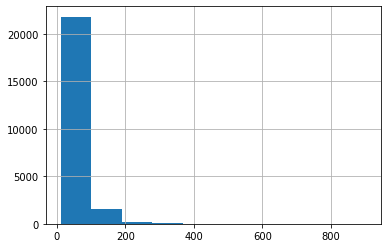

In [ ]:
df['total_area'].hist().legend = False

#### Разбиваю необходимые нам количественные переменные
**на категории для построения сводных таблиц, по которым создаю функцию для заполнения пропусков в "kitchen_area"**

In [ ]:
df.groupby('total_area_category')['total_area'].agg(['count', 'mean','median'])

,count,mean,median
total_area_category,,,
"(11.999, 37.6]",4733,32.555542,33.00
"(37.6, 46.0]",4962,42.275143,42.30
"(46.0, 58.0]",4563,52.377690,52.39
"(58.0, 74.9]",4635,65.491786,65.00
"(74.9, 900.0]",4720,109.833892,93.49


In [ ]:
df['kitchen_area_category'] = pd.qcut(df['kitchen_area'], 5)

In [ ]:
df.groupby('kitchen_area_category')['total_area'].agg(['count', 'mean','median'])

,count,mean,median
kitchen_area_category,,,
"(1.2990000000000002, 6.8]",4341,44.572483,44.0
"(6.8, 8.4]",4249,50.039536,48.1
"(8.4, 10.0]",4352,53.812137,51.0
"(10.0, 12.9]",4191,61.061081,57.9
"(12.9, 112.0]",4249,94.665863,81.8


In [ ]:
df.groupby('kitchen_area_category')['kitchen_area'].agg(['count', 'mean','median'])

,count,mean,median
kitchen_area_category,,,
"(1.2990000000000002, 6.8]",4341,5.840442,6.0
"(6.8, 8.4]",4249,7.640770,7.8
"(8.4, 10.0]",4352,9.325600,9.2
"(10.0, 12.9]",4191,11.274536,11.0
"(12.9, 112.0]",4249,18.881290,16.0


In [ ]:
def categorize_kitchen_area(area):
    try:
        if 11.9 <= area <= 37.6:
            return 6
        elif 37.60 < area <= 46:
            return 7.8
        elif 46 < area <= 58:
            return 9.2
        elif 58 < area <= 75:
            return 11
        elif area > 75:
            return 16
    except:
        pass


df.loc[df['kitchen_area'].isna() , 'kitchen_area'] = df['total_area'].apply(categorize_kitchen_area)
df.isna().mean()


total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.882480
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.486173
locality_name            0.002033
airports_nearest         0.234278
cityCenters_nearest      0.233304
parks_around3000         0.233261
parks_nearest            0.659298
ponds_around3000         0.233261
ponds_nearest            0.616271
days_exposition          0.134333
living_area_category     0.079194
total_area_category      0.000000
kitchen_area_category    0.094482
dtype: float64

### Заполним пропуски в колонке locality_name

In [ ]:
df.loc[df['locality_name'].isna() , 'locality_name'] = 'неизвестно'
df.isna().mean()


total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.882480
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.486173
locality_name            0.000000
airports_nearest         0.234278
cityCenters_nearest      0.233304
parks_around3000         0.233261
parks_nearest            0.659298
ponds_around3000         0.233261
ponds_nearest            0.616271
days_exposition          0.134333
living_area_category     0.079194
total_area_category      0.000000
kitchen_area_category    0.094482
dtype: float64

**Можем видеть, что количество явных дубликатов равна 0**


In [ ]:
df.duplicated().sum()

0

#### Проверим неявные дубликаты в колонке locality_name

In [ ]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Видим что в колонке присутствуют неявные дубликаты.
Попытаемся от них избавиться**

**Пример неявных дубликатов**

In [ ]:
locality_names = []
for i in range(len(df['locality_name'].unique())):
    if 'Никольское' in df['locality_name'].unique()[i]:
        locality_names.append(df['locality_name'].unique()[i])
locality_names

['Никольское', 'село Никольское']

**Приведем данные в locality_name к общему виду, для этого приведем их к нижнему регистру и отфильтруем через функцию "приставку" в названии населенного пункта**

In [ ]:
df['locality_name'] = df['locality_name'].str.lower()

In [ ]:
def filtr_locality_name(name):
    try:
        if 'городск' in name[:7]:
            return name[18:]
        elif 'городского' in name[8:18]:
            return name[24:]
        elif 'коттеджный' in name[:10]:
            return name[19:]
        elif 'поселок' in name[:7] or 'посёлок' in name[:7] or 'деревня' in name[:7]:
            return name[8:]
        elif 'село' in name[:4]:
            return name[5:]
        else:
            return name
    except:
        return name

In [ ]:
df['locality_name'] = df['locality_name'].apply(filtr_locality_name)
df['locality_name'].unique()


array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'садовое товарищество новая ропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'аннино', 'ефимовский', 'плодовое',
       'заклинье', 'торковичи', 'первомайское', 'красное село',
       'понтонный', 'сясьстрой', 'старая', 'лесколово', 'новый свет',
       'сланцы', 'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрел

**Перепроверим, что наши преобразования не добавили явных дубликатов**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23613 entries, 0 to 23612
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   total_images           23613 non-null  int64   
 1   last_price             23613 non-null  float64 
 2   total_area             23613 non-null  float64 
 3   first_day_exposition   23613 non-null  object  
 4   rooms                  23613 non-null  int64   
 5   ceiling_height         23613 non-null  float64 
 6   floors_total           23613 non-null  int64   
 7   living_area            23613 non-null  float64 
 8   floor                  23613 non-null  int64   
 9   is_apartment           2775 non-null   object  
 10  studio                 23613 non-null  bool    
 11  open_plan              23613 non-null  bool    
 12  kitchen_area           23613 non-null  float64 
 13  balcony                12133 non-null  float64 
 14  locality_name          23613 non-null 

<div class="alert alert-info">
    
**Изменяю тип данных в тех переменных где логически представлять целочисленным числом**</div>

### Пропуски в balcony

<div class="alert alert-info">
    
**Заменяю пропуски в balcony потому что наиболее вероятно что раз продавец не указал число балконов то оно равно 0**</div>

In [ ]:
df.loc[df['balcony'].isna() , 'balcony'] = 0
df['balcony'] = df['balcony'].astype(int)
df['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

### Работа с parks_around3000, ponds_around3000

<div class="alert alert-info">
    
**Обработка пропусков в parks_around3000, ponds_around3000**</div>

In [ ]:
df.isna().mean()

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.882480
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest         0.234278
cityCenters_nearest      0.233304
parks_around3000         0.233261
parks_nearest            0.659298
ponds_around3000         0.233261
ponds_nearest            0.616271
days_exposition          0.134333
living_area_category     0.079194
total_area_category      0.000000
kitchen_area_category    0.094482
dtype: float64

**Заметил интересную особенность, что столбцы airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 имеют одинаковый процент пропусков**

**Выдвину гипотезу относительно того, что эти пропуски могли возникнуть из-за сбоя алгоритма сбора данных в тех квартирах которые далеко расположены от СПБ, т.е села, поселки, и тд и проверю ее**

**Пытаемся заполнить их там где это возможно
проверим нашу гипотезу в столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000**



In [ ]:
len(df.loc[(df['airports_nearest'].isna()) & (df['cityCenters_nearest'].isna())
& (df['parks_around3000'].isna())
& (df['ponds_around3000'].isna())])

5508

**Интересно, гипотеза похожа на правду и большинство пропусков в этих столбцах находится в 'селах и деревнях'**

In [ ]:
len(df.loc[(df['airports_nearest'].isna()) & (df['cityCenters_nearest'].isna())
& (df['parks_around3000'].isna())
& (df['ponds_around3000'].isna())
& (df['locality_name'] != 'санкт-петербург'), 'locality_name'])

5448

**Проверим сколько пропусков в СПБ**

In [ ]:
len(df.loc[(df['airports_nearest'].isna()) & (df['cityCenters_nearest'].isna())
& (df['parks_around3000'].isna())
& (df['ponds_around3000'].isna())
& (df['locality_name'] == 'санкт-петербург'), 'locality_name'])

60

**60 пропусков - теперь я могу сделать явный вывод относительно пропусков в данных колонках**

**пропуски возникли из за неверного сбора данных**

**Сначала заполним столбцы parks_around3000, ponds_around3000 нулем у тех квартир, которые не находится в пределах СПБ**

In [ ]:
(df.loc[(df['locality_name'] != 'санкт-петербург')  & (df['parks_around3000'].isna())
        & (df['ponds_around3000'].isna()), ['parks_around3000', 'ponds_around3000']]) = 0

In [ ]:
df.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment             20838
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5532
cityCenters_nearest       5509
parks_around3000            60
parks_nearest            15568
ponds_around3000            60
ponds_nearest            14552
days_exposition           3172
living_area_category      1870
total_area_category          0
kitchen_area_category     2231
dtype: int64

**Удалим оставшиеся 60 пропусков в parks_around3000 и ponds_around3000 для представление их в целочисленном типе**

In [ ]:
df = df.dropna(subset=['parks_around3000', 'ponds_around3000']).reset_index(drop=True)

In [ ]:
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment             20783
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5472
cityCenters_nearest       5449
parks_around3000             0
parks_nearest            15508
ponds_around3000             0
ponds_nearest            14492
days_exposition           3137
living_area_category      1855
total_area_category          0
kitchen_area_category     2216
dtype: int64

## Начнем поиск аномалий в нашем датасете

### Взглянем на гистограммы распределения данных

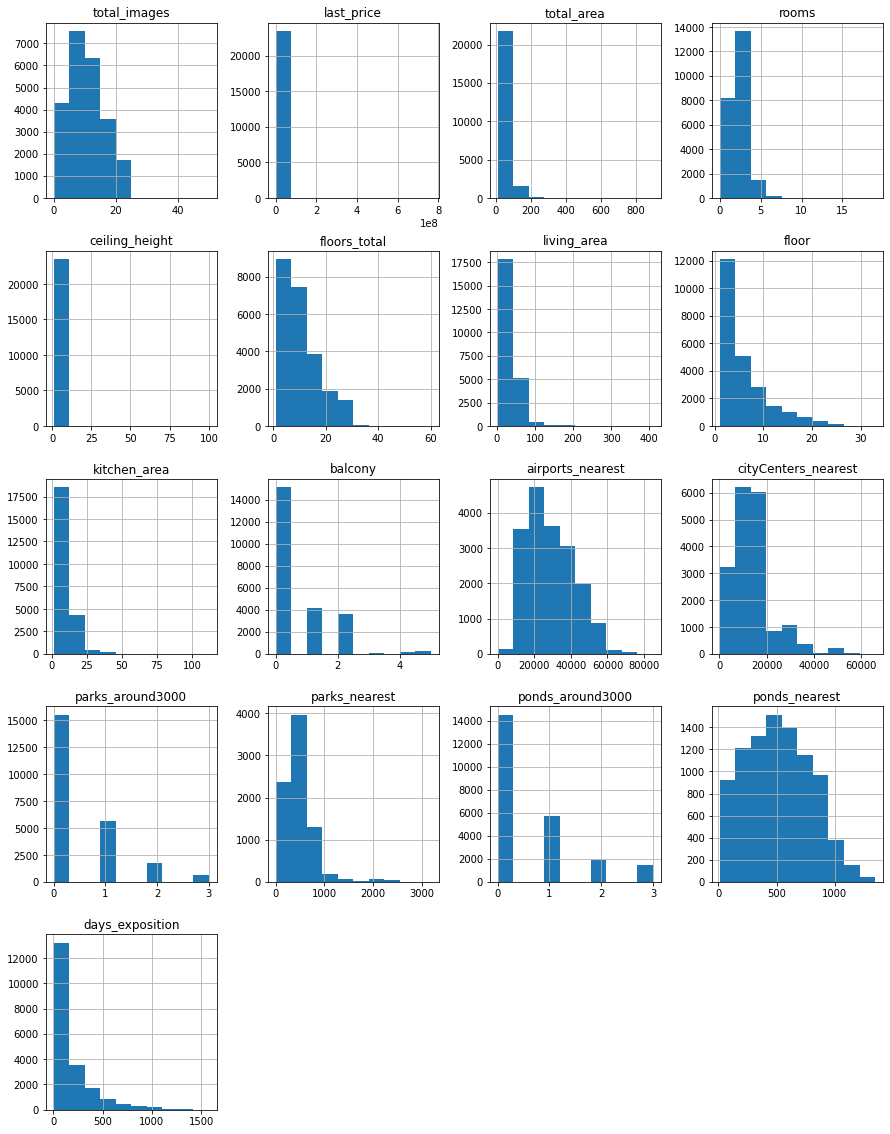

In [ ]:
columns_hist = df.hist(figsize=(15, 20))

**Видим аномалии в гистограммах:**

**'total_images'**

**'last_price'**

**'total_area'**

**'ceiling_height'**

**'floors_total'**

**'living_area'**

**'kitchen_area'**

**'airports_nearest'**

**'cityCenters_nearest'**

**'parks_nearest'**

**'days_exposition'**

### Выведем исходные гистограммы.

<div class="alert alert-info">
    
**Построим 'boxplot' для каждой искомой переменной**

**Создадим функцию для приведения аномальных значений к краю межквантильных размахов**

**Посмотрим и опишем получившиеся распределение на гистограмме**</div>

In [ ]:
def slice_quantile(column):
    IQR = Q3 - Q1
    max_q = Q3+1.5*IQR
    min_q = Q1-1.5*IQR
    try:
        if column < min_q:
            return min_q
        elif column > max_q:
            return max_q
        else:
            return column
    except:
        return column

20.0

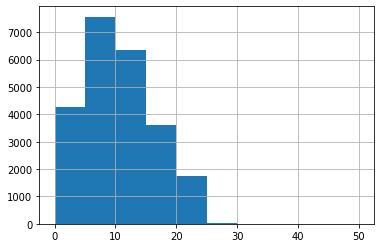

In [ ]:
df['total_images'].hist()
df['total_images'].quantile(0.99)

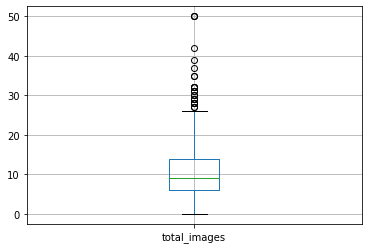

In [ ]:
df.boxplot(column=['total_images']).legent = False

In [ ]:
Q1 = df['total_images'].quantile(0.25)
Q3 = df['total_images'].quantile(0.75)
df['total_images'] = df['total_images'].apply(slice_quantile)

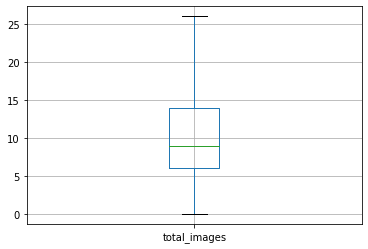

In [ ]:
df.boxplot(column="total_images").legent = False


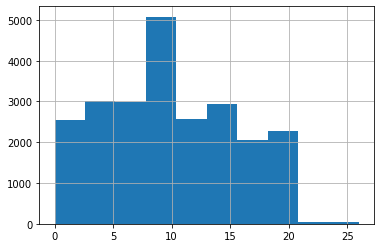

In [ ]:
df['total_images'].hist().legent = False

**Гистограмма напоминает нормальное распределение с пиковым значением 8 фотографий.**

**Сделаем то же самое для колонки цены, применив нашу функцию и делаем то же самое с остальными переменными**

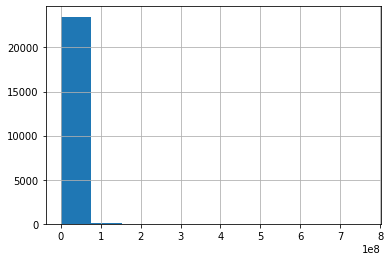

In [ ]:
df['last_price'].hist().legent = False

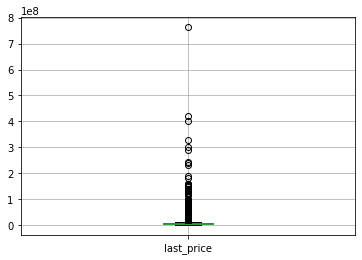

In [ ]:
df.boxplot(column="last_price").legent = False

In [ ]:
Q1 = df['last_price'].quantile(0.25)
Q3 = df['last_price'].quantile(0.75)
df['last_price'] = df['last_price'].apply(slice_quantile)

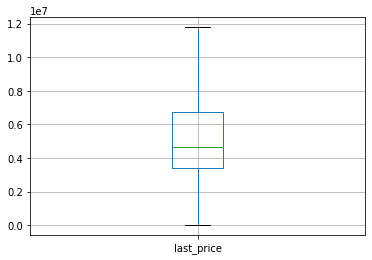

In [ ]:
df.boxplot(column="last_price").legent = False

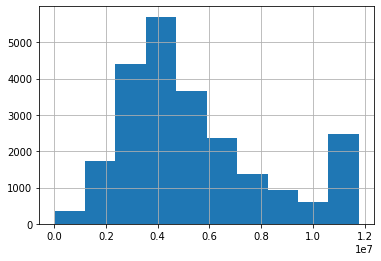

In [ ]:
df['last_price'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо край которой находится на значении ~24e+05, большинство наблюдений расположенно в диапазоне ~24e+05-58e+05**

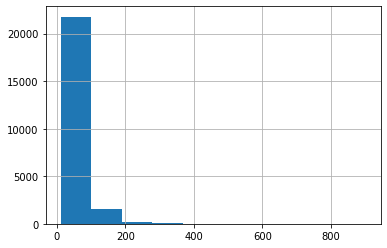

In [ ]:
df['total_area'].hist().legent = False

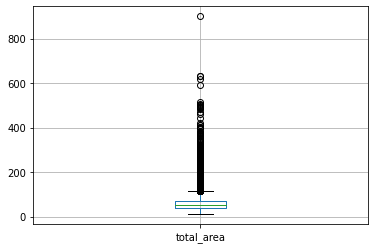

In [ ]:
df.boxplot(column=['total_area']).legent = False

In [ ]:
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
df['total_area'] = df['total_area'].apply(slice_quantile)

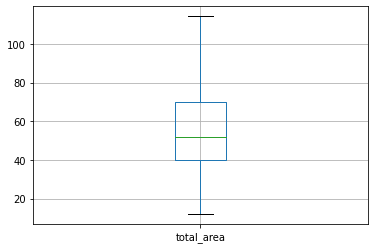

In [ ]:
df.boxplot(column=['total_area']).legent = False

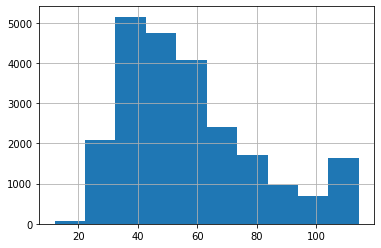

In [ ]:
df['total_area'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо край которой находится на значении ~30кв.м., большинство наблюдений расположенно в диапазоне ~30-62кв.м.**

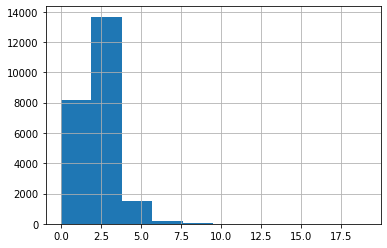

In [ ]:
df['rooms'].hist().legent = False

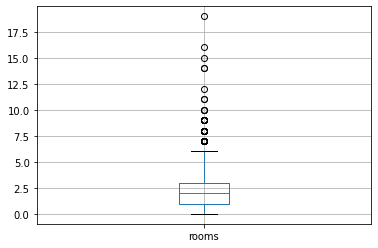

In [ ]:
df.boxplot(column=['rooms']).legent = False

In [ ]:
Q1 = df['rooms'].quantile(0.25)
Q3 = df['rooms'].quantile(0.75)
df['rooms'] = df['rooms'].apply(slice_quantile)

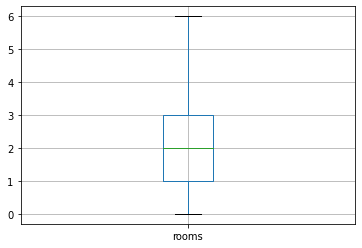

In [ ]:
df.boxplot(column=['rooms']).legent = False

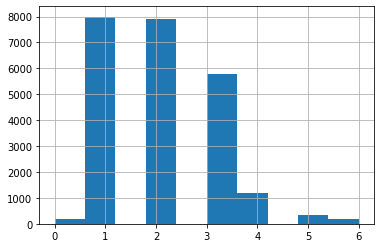

In [ ]:
df['rooms'].hist().legent = False

**Видим что большенство наблюдений rooms расположенно на значениях 1-3 комнат по отношению к другим значениям**

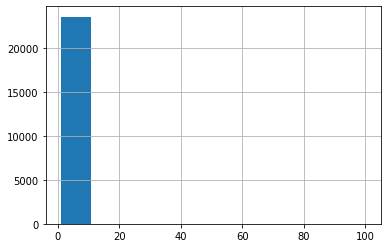

In [ ]:
df['ceiling_height'].hist().legent = False

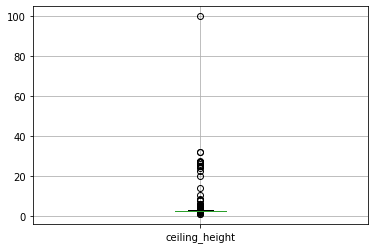

In [ ]:
df.boxplot(column=['ceiling_height']).legent = False

In [ ]:
Q1 = df['ceiling_height'].quantile(0.25)
Q3 = df['ceiling_height'].quantile(0.75)
df['ceiling_height'] = df['ceiling_height'].apply(slice_quantile)

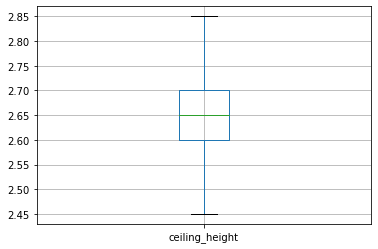

In [ ]:
df.boxplot(column=['ceiling_height']).legent = False

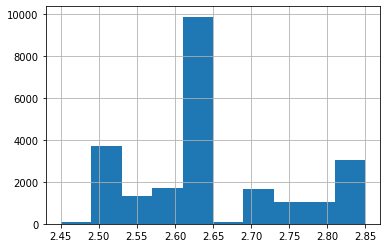

In [ ]:
df['ceiling_height'].hist().legend = False

**Видим пиковые значения на диапазоне 2.6-2.65м. , большинство квартир имеет эту высоту потолка**

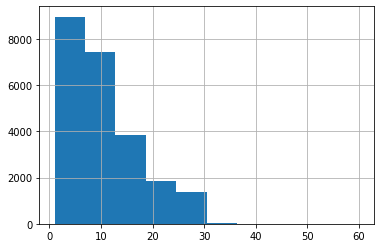

In [ ]:
df['floors_total'].hist().legend = False

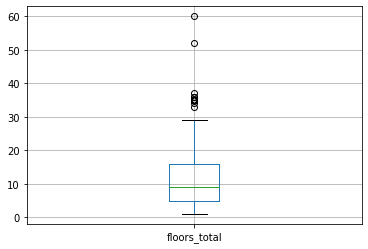

In [ ]:
df.boxplot(column=['floors_total']).legend = False

In [ ]:
Q1 = df['floors_total'].quantile(0.25)
Q3 = df['floors_total'].quantile(0.75)
df['floors_total'] = df['floors_total'].apply(slice_quantile)

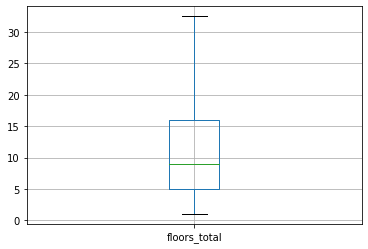

In [ ]:
df.boxplot(column=['floors_total']).legend = False

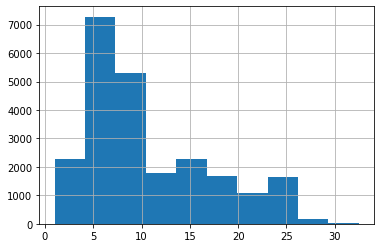

In [ ]:
df['floors_total'].hist().legent = False

**По результатам пиковых значений видим что гистограмма напоминает Гипергеометрическое распределение  большинство наблюдений, расположенно в пиковых значениях:~ 5, 9**

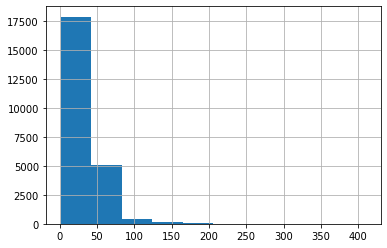

In [ ]:
df['living_area'].hist().legend = False

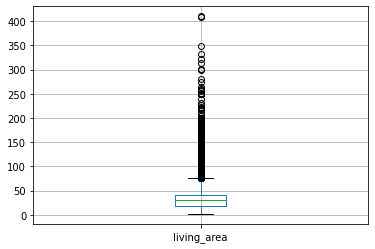

In [ ]:
df.boxplot(column=['living_area']).legend = False

In [ ]:
Q1 = df['living_area'].quantile(0.25)
Q3 = df['living_area'].quantile(0.75)
df['living_area'] = df['living_area'].apply(slice_quantile)

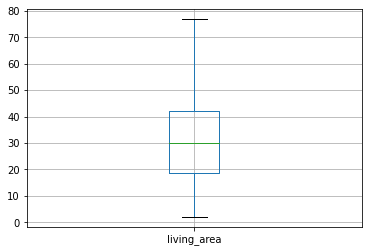

In [ ]:
df.boxplot(column=['living_area']).legend = False

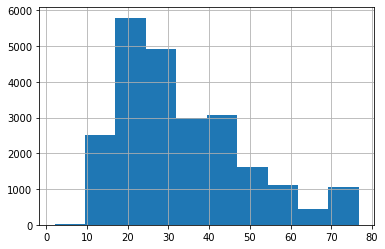

In [ ]:
df['living_area'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо край которой находится на значении ~18кв.м., большинство наблюдений расположенно в диапазоне ~18-45кв.м.**

<div class="alert alert-info">
    
**Срезал по краям межквантильного размаха**</div>

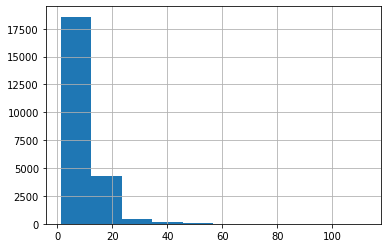

In [ ]:
df['kitchen_area'].hist().legend = False

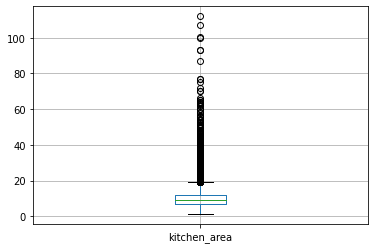

In [ ]:
df.boxplot(column=['kitchen_area']).legend = False

In [ ]:
Q1 = df['kitchen_area'].quantile(0.25)
Q3 = df['kitchen_area'].quantile(0.75)
df['kitchen_area'] = df['kitchen_area'].apply(slice_quantile)

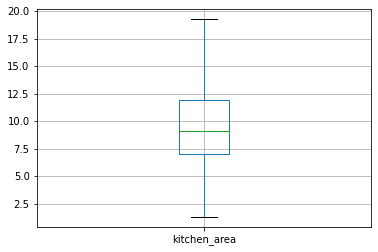

In [ ]:
df.boxplot(column=['kitchen_area']).legend = False

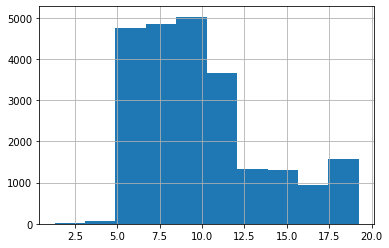

In [ ]:
df['kitchen_area'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо край которой находится на значении ~4кв.м., большинство наблюдений расположенно в диапазоне ~4-11кв.м.**

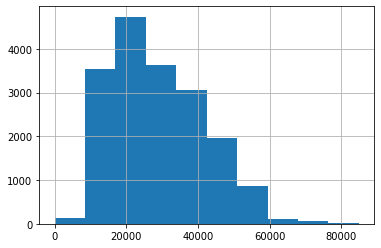

In [ ]:
df['airports_nearest'].hist().legend = False

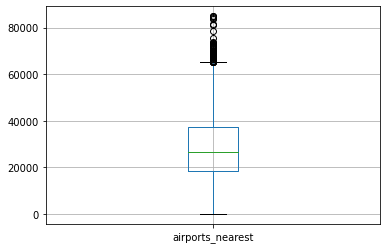

In [ ]:
df.boxplot(column=['airports_nearest']).legend = False

In [ ]:
Q1 = df['airports_nearest'].quantile(0.25)
Q3 = df['airports_nearest'].quantile(0.75)
df['airports_nearest'] = df['airports_nearest'].apply(slice_quantile)

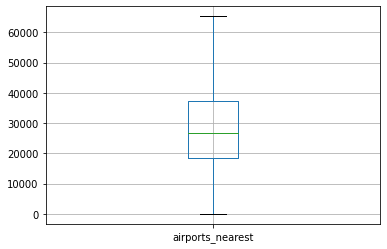

In [ ]:
df.boxplot(column=['airports_nearest']).legend = False

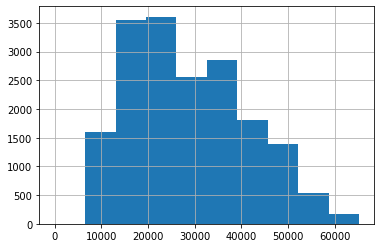

In [ ]:
df['airports_nearest'].hist().legent = False

**Распределение Паскаля с пиковыми значениями в диапазоне ~11тыс.м.-39тыс.м.**

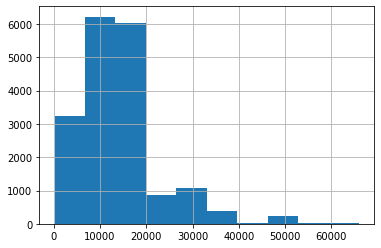

In [ ]:
df['cityCenters_nearest'].hist().legend = False

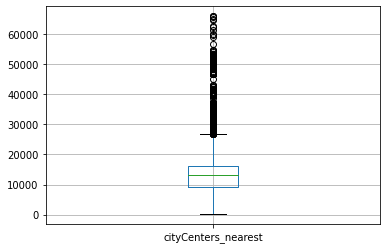

In [ ]:
df.boxplot(column=['cityCenters_nearest']).legend = False

In [ ]:
Q1 = df['cityCenters_nearest'].quantile(0.25)
Q3 = df['cityCenters_nearest'].quantile(0.75)
df['cityCenters_nearest'] = df['cityCenters_nearest'].apply(slice_quantile)

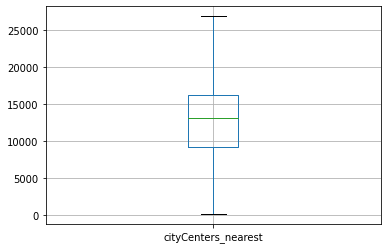

In [ ]:
df.boxplot(column=['cityCenters_nearest']).legend = False

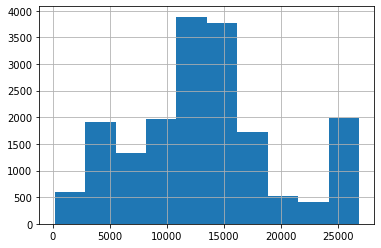

In [ ]:
df['cityCenters_nearest'].hist().legent = False

**Гистограмма напоминает нормальное распределение, большинство наблюдений расположенно в диапазоне ~11-16тыс.м.**

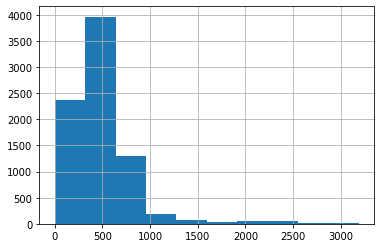

In [ ]:
df['parks_nearest'].hist().legend = False

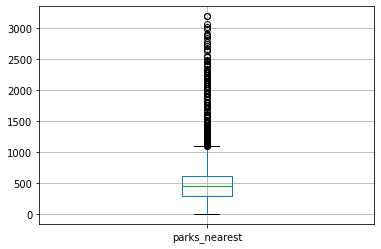

In [ ]:
df.boxplot(column=['parks_nearest']).legend = False

In [ ]:
Q1 = df['parks_nearest'].quantile(0.25)
Q3 = df['parks_nearest'].quantile(0.75)
df['parks_nearest'] = df['parks_nearest'].apply(slice_quantile)

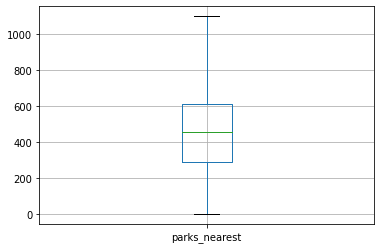

In [ ]:
df.boxplot(column=['parks_nearest']).legend = False

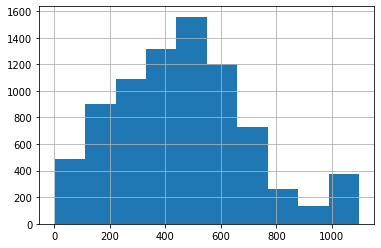

In [ ]:
df['parks_nearest'].hist().legent = False

**Гистограмма напоминает биномиальное распределение, большинство наблюдений расположенно в диапазоне ~180-780м.**

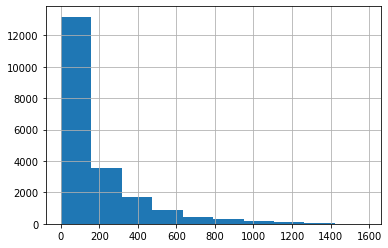

In [ ]:
df['days_exposition'].hist().legend = False

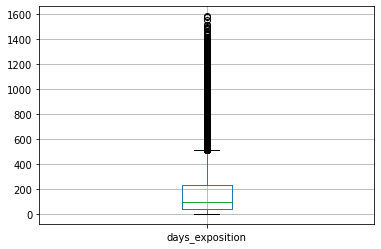

In [ ]:
df.boxplot(column=['days_exposition']).legend = False

In [ ]:
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)
df['days_exposition'] = df['days_exposition'].apply(slice_quantile)

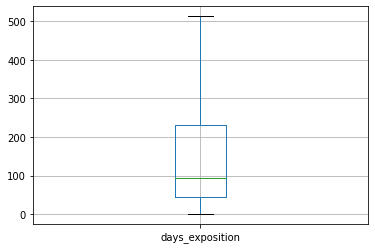

In [ ]:
df.boxplot(column=['days_exposition']).legend = False

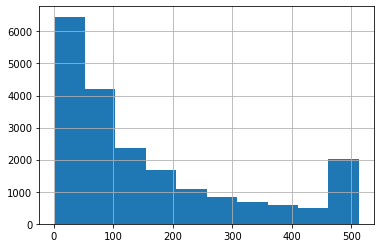

In [ ]:
df['days_exposition'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо, большинство наблюдений расположенно в диапазоне ~0-210 дней**

#### Опишем гистограмму распределения этажа
**на котором находится квартира**

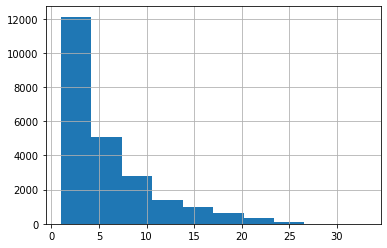

In [ ]:
df['floor'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо край которой находится на значении ~1 этажа, большинство наблюдений расположенно в диапазоне ~1-7 этажа**

### Посчитал и добавил в таблицу цену одного метра жилплощади

In [ ]:
df['price_of_one_meter'] = df['last_price']/df['total_area']
df['price_of_one_meter'].head()

0    109027.777778
1     82920.792079
2     92785.714286
3    103063.457330
4    100000.000000
Name: price_of_one_meter, dtype: float64

### Задание с датой: "Привести к нужному формату"
**Сделаем дату в нужном нам формате для качественного отображения и последеющей работы с этой переменной**

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### Добавляем в таблицу значения:
**дня недели(weekday), месяца(month) и года(year). Исходя из переменной first_day_exposition**

In [ ]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

In [ ]:
df['month'] = df['first_day_exposition'].dt.month
df['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

In [ ]:
df['year'] = df['first_day_exposition'].dt.year
df['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

### Добавим в исходный датасет колонку
**С обозначением этажа в формате - первый, последний, другой**


**Создадим для этого функцию**

In [ ]:
df['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [ ]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
row_values = [0, 0]
row_columns = ['floors_total', 'floor']
row = pd.Series(data=row_values, index=row_columns)

In [ ]:
df['apartment_floor_type'] = df.apply(floor_type, axis = 1)
df['apartment_floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**Посмотрим на распределение**

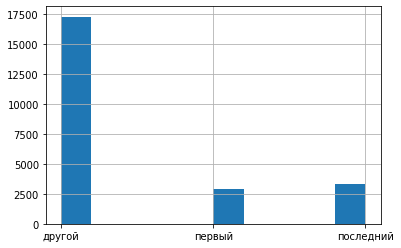

In [ ]:
df['apartment_floor_type'].hist().legend = False

**Видим что большинство наблюдений не сосредоточенно на этажах первый, последний**

### Добавим в датасет колонку
**с переведенными значениями из cityCenters_nearest в км**

In [ ]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000, 1)
df['cityCenters_nearest_km'].head(10)

0    16.0
1    18.6
2    13.9
3     6.8
4     8.1
5     NaN
6    19.1
7    11.6
8     NaN
9    15.0
Name: cityCenters_nearest_km, dtype: float64

<div class="alert alert-info">
    
**Округлил до 1 цифры после запятой методом round()**</div>

### Вывод по результатам предобработки данных:

**По результатам предобработки данных мы можем заметить большое количество пропусков в данных, некоторые из них обусловлены техническими особенностями представлением квартир на продажу.**

**(Как например отсутствие данных о кухне может быть свидетельством, что квартира студия)**

**Также заметим присутствие неявных дубликатов, вызванными не стандартизированными примерами заполнениями полей.**

**(к примеру в столбце locality_name, с селами)**

**Привели колонки('floors_total', 'floor',  'living_area') к единому типу данных, для корректного их счисления.**

**Заполнили, там где это возможно пропуски в колонках('kitchen_area' 'locality_name').**

**Не заполняли данными колонку, 'balcony', так как она имееют низкую корреляцию по отношению к цене**

**Срезали аномалии,  для того, чтобы была наглядность и рациональность распределения данных**

**А также добавили по заданию:**

**-Корректный формат времени выставления на продажу квартир('first_day_exposition')**

**-Добавили колонку обозначения этажа в формате(первый, последний, другой('apartment_floor_type')**

**-Добавили колонку 'cityCenters_nearest_km' состоавленную из 'cityCenters_nearest', но представленную в км**

## Проведите исследовательский анализ данных

### Исследовательские days_exposition

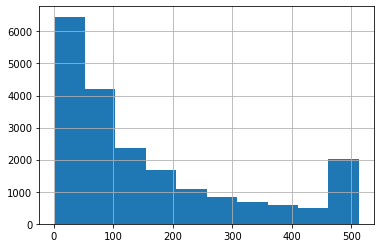

In [ ]:
df['days_exposition'].hist().legent = False

**Гистограмма напоминает распределение Пуассонна со смещением вправо край которой находится на значении ~до 100 дней, большинство наблюдений расположенно в диапазоне ~100-180 дней**

In [ ]:
df['days_exposition_category'] = pd.qcut(df['days_exposition'], 5)
df.groupby('days_exposition_category')['last_price'].agg(['count', 'mean','median'])

,count,mean,median
days_exposition_category,,,
"(0.999, 35.0]",4198,5.030534e+06,4400000.0
"(35.0, 67.0]",4004,4.687443e+06,4200000.0
"(67.0, 135.0]",4073,5.446121e+06,4600000.0
"(135.0, 287.0]",4058,5.386047e+06,4600000.0
"(287.0, 512.5]",4083,5.897903e+06,5000000.0


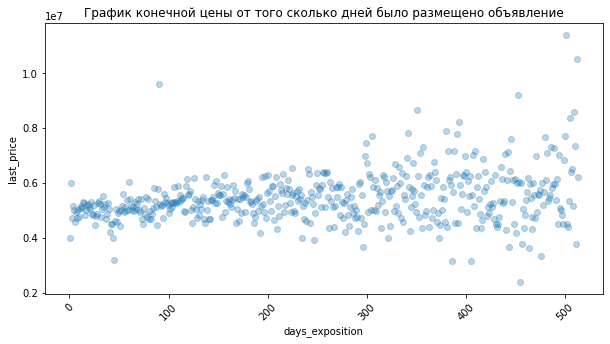

In [ ]:
df.groupby('days_exposition')['last_price'].mean().plot(figsize = [10, 5], style='o', alpha=0.3, rot=45, ylabel='last_price', title = 'График конечной цены от того сколько дней было размещено объявление').legend = False

In [ ]:
df['days_exposition'].corr(df['last_price'])

0.13471518608254854

**Наблюдаем низкий коэффициент корреляции от того сколько дней было размещено объявление относительно конечной цены**

**Не наблюдаем четкого тренда взаимосвязи цены от того сколько дней было размещено объявление, учитывая низкий коэффициент корреляции делаем вывод что нет непосредственного влияния на цену**

**возьмем переменную days_exposition_category поделенную на 5 (0.2, 0.4, 0.6, 0,8 по куантилям) категорий и будем принимать крайние значения 'быстрыми' и 'меделенными' продажами: медленные продажи (куантиль > 0.8), нормальные продажи(0.2 < куантиль < 0.8), быстрые продажи(куантиль < 0.2) и посмотрим на их значения**

In [ ]:
df.groupby('days_exposition_category')['last_price'].count()

days_exposition_category
(0.999, 35.0]     4198
(35.0, 67.0]      4004
(67.0, 135.0]     4073
(135.0, 287.0]    4058
(287.0, 512.5]    4083
Name: last_price, dtype: int64

**Обычно продажа квартиры занимает от 35 до 287 дней, те что ниже 35 дней принимаем за быстрые продажи, что выше 287 дней считаем долгими продажами**

### Выявим зависимость цены от каждой переменной
**Для этого сделаем: группировку данных относительно цены для отражения в сводной таблице значений для сравнения, построим гистограммы для описания распределения и выясним значение линейной корреляции**

In [ ]:
df.groupby('total_area_category')['last_price'].agg(['count', 'mean'])

,count,mean
total_area_category,,
"(11.999, 37.6]",4723,3.142185e+06
"(37.6, 46.0]",4959,3.915621e+06
"(46.0, 58.0]",4555,4.696979e+06
"(58.0, 74.9]",4619,6.022203e+06
"(74.9, 900.0]",4697,9.475570e+06


### График цены от площади

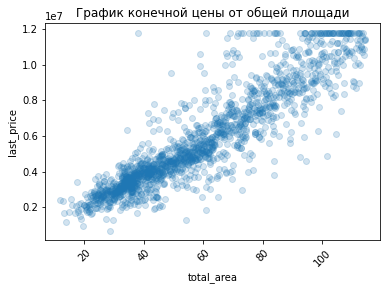

In [ ]:
df.groupby('total_area')['last_price'].mean().plot(rot=45, ylabel='last_price', title = 'График конечной цены от общей площади', style='o', alpha=0.2).legend = False

<div class="alert alert-info">
    
**Изменил тип графика для непрерывных переменных на scatter**</div>

In [ ]:
df['total_area'].corr(df['last_price'])

0.8103496164343292

**Наблюдаем высокую корреляцию цены от общей площади**

**По графику мы видим что присутствует линейная зависимость и делаем вывод что чем больше общая площадь тем выше стоимость квартиры.**

**Вычислим категориальную переменную по столбцу living_area для построения сводной таблицы**

In [ ]:
df['living_area_category'] = pd.qcut(df['living_area'], 5)

### График цены от жилплощади

In [ ]:
df.groupby('living_area_category')['last_price'].agg(['count', 'mean'])

,count,mean
living_area_category,,
"(1.999, 18.0]",5320,3.480639e+06
"(18.0, 27.5]",4118,4.165606e+06
"(27.5, 33.4]",4699,4.625138e+06
"(33.4, 45.0]",4778,6.026110e+06
"(45.0, 76.8]",4638,9.007958e+06


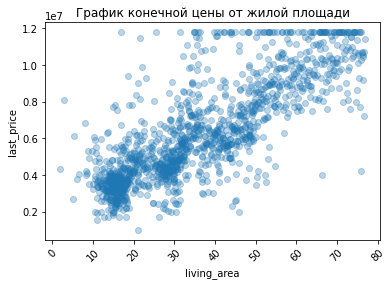

In [ ]:
df.groupby('living_area')['last_price'].mean().plot(rot=45, style='o', alpha=0.3, ylabel='last_price', title = 'График конечной цены от жилой площади').legend = False

In [ ]:
df['living_area'].corr(df['last_price'])

0.7087220409019869

**Наблюдаем средний коэффициент корреляции жилплощади относительно конечной цены**

**По графику мы видим что присутствует линейная зависимость и делаем вывод что чем больше жилая площадь тем выше стоимость квартиры.**

### График цены от площади кухни

In [ ]:
df.groupby('kitchen_area_category')['last_price'].agg(['count', 'mean'])

,count,mean
kitchen_area_category,,
"(1.2990000000000002, 6.8]",4340,3.533813e+06
"(6.8, 8.4]",4238,4.448450e+06
"(8.4, 10.0]",4343,4.909031e+06
"(10.0, 12.9]",4185,6.025902e+06
"(12.9, 112.0]",4231,8.588001e+06


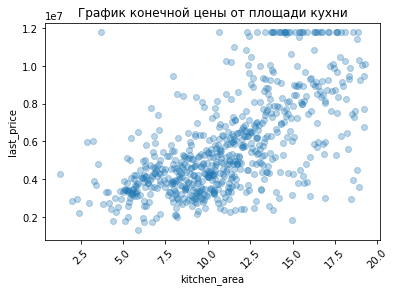

In [ ]:
df.groupby('kitchen_area')['last_price'].mean().plot(rot=45, style='o', alpha=0.3, ylabel='last_price', title = 'График конечной цены от площади кухни').legend = False

In [ ]:
df['kitchen_area'].corr(df['last_price'])

0.6523492782555271

**Наблюдаем средний коэффициент корреляции площади кухни относительно конечной цены**

**По графику мы видим что присутствует линейная зависимость и делаем вывод что чем больше площадь кухни тем выше стоимость квартиры.**

### График цены от кол-ва комнат

In [ ]:
df.groupby('rooms')['last_price'].agg(['count', 'mean'])

,count,mean
rooms,,
0.0,194,3.015885e+06
1.0,7995,3.791613e+06
2.0,7895,5.288685e+06
3.0,5780,6.844165e+06
4.0,1176,8.651055e+06
5.0,322,1.050184e+07
6.0,191,1.156256e+07


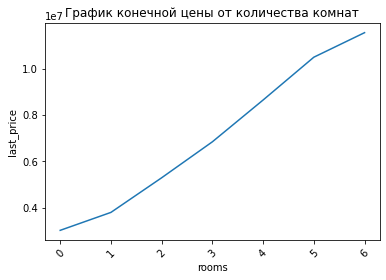

In [ ]:
df.groupby('rooms')['last_price'].mean().plot(rot=45, ylabel='last_price', title = 'График конечной цены от количества комнат').legend = False

**Наблюдаем средний коэффициент корреляции кол-ва комнат относительно конечной цены**

**По графику мы видим что присутствует экспоненциальный рост зависимости до значения 7 комнат и делаем вывод что чем больше комнат тем выше стоимость квартиры вплоть до 7 комнат, при значении выше 7 комнат цена остается на одном уровне**

### График цены от высоты потолков

In [ ]:
df.groupby('ceiling_height')['last_price'].agg(['count', 'mean']).head()

,count,mean
ceiling_height,,
2.45,59,3.448034e+06
2.46,2,6.450000e+06
2.47,3,4.636667e+06
2.48,8,4.163625e+06
2.49,1,6.800000e+06


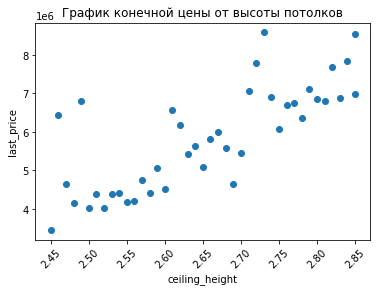

In [ ]:
df.groupby('ceiling_height')['last_price'].mean().plot(rot=45, style='o', alpha=1, ylabel='last_price', title = 'График конечной цены от высоты потолков').legend = False

In [ ]:
df['ceiling_height'].corr(df['last_price'])

0.44991093424061507

**Наблюдаем средний коэффициент корреляции высоты потолков относительно конечной цены**

**По графику мы видим что присутствует тренд линейной зависимость и делаем вывод что чем выше высота потолков тем выше стоимость квартиры, на графике наблюдаем скачки значения цены**

### График цены от этажа

In [ ]:
df.groupby('floor')['last_price'].agg(['count', 'mean']).head()

,count,mean
floor,,
1,2910,4.415569e+06
2,3360,5.326947e+06
3,3060,5.530963e+06
4,2787,5.605425e+06
5,2607,5.219343e+06


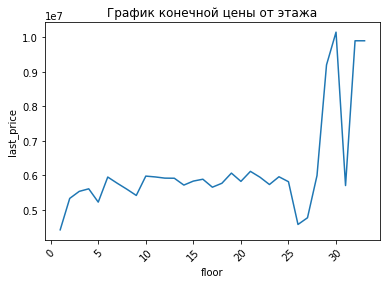

In [ ]:
df.groupby('floor')['last_price'].mean().plot(rot=45, ylabel='last_price', title = 'График конечной цены от этажа').legend = False

**По графику мы видим сильные колебания цены и тренд роста, цена зависит от того на каком этаже расположенна квартира**

### График цены от типа этажа

In [ ]:
df.groupby('apartment_floor_type')['last_price'].agg(['count', 'mean'])

,count,mean
apartment_floor_type,,
другой,17311,5.644575e+06
первый,2910,4.415569e+06
последний,3332,5.226172e+06


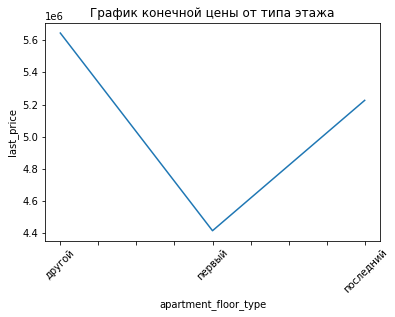

In [ ]:
df.groupby('apartment_floor_type')['last_price'].mean().plot(rot=45, ylabel='last_price', title = 'График конечной цены от типа этажа').legend = False

**По графику мы видим что цена у квартиры которая расположенна на первом этаже ниже чем на остальных**

### График цены от максимального этажа здания

In [ ]:
df.groupby('floors_total')['last_price'].agg(['count', 'mean']).head()

,count,mean
floors_total,,
1.0,25,2.788200e+06
2.0,383,3.027163e+06
3.0,666,4.856812e+06
4.0,1198,6.263764e+06
5.0,5779,4.465299e+06


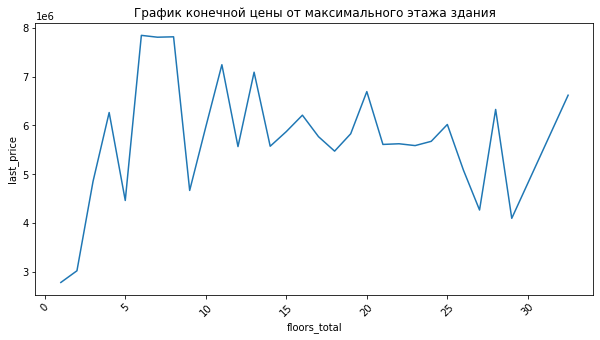

In [ ]:
df.groupby('floors_total')['last_price'].mean().plot(figsize = [10, 5], rot=45, ylabel='last_price', title = 'График конечной цены от максимального этажа здания').legend = False

**По графику мы видим сильные колебания цены, конкретного тренда не наблюдается, цена не сильно зависит от того сколько этажей у здания в котором расположенна квартира**

### График цены от расстояния до центра

In [ ]:
df['cityCenters_nearest_category'] = pd.qcut(df['cityCenters_nearest'], 5)
df.groupby('cityCenters_nearest_category')['last_price'].agg(['count', 'mean'])

,count,mean
cityCenters_nearest_category,,
"(180.999, 7737.0]",3623,8.902825e+06
"(7737.0, 11905.0]",3620,6.131350e+06
"(11905.0, 14445.0]",3622,5.715819e+06
"(14445.0, 17233.0]",3621,5.416633e+06
"(17233.0, 26866.875]",3618,4.668082e+06


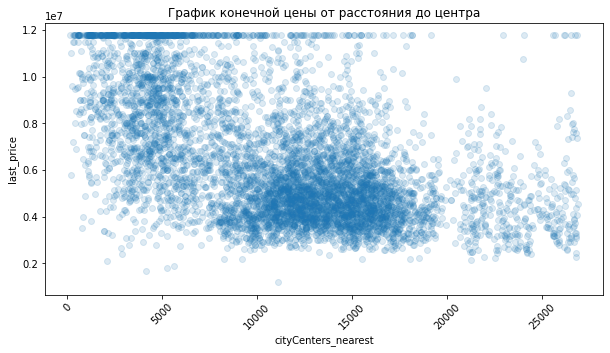

In [ ]:
df.groupby('cityCenters_nearest')['last_price'].mean().plot( style='o', alpha=0.15 ,figsize = [10, 5], rot=45, ylabel='last_price', title = 'График конечной цены от расстояния до центра').legend = False

In [ ]:
df['cityCenters_nearest'].corr(df['last_price'])

-0.4659185833004975

**Наблюдаем средний коэффициент корреляции расстояния до центра относительно конечной цены**

**По графику мы видим что присутствует тренд линейной зависимости и делаем вывод что чем ближе квартира находится к центру населенного пункта тем выше стоимость квартиры**

### График цены от расстояния до аэропорта

In [ ]:
df['airports_nearest_category'] = pd.qcut(df['airports_nearest'], 5)
df.groupby('airports_nearest_category')['last_price'].agg(['count', 'mean'])

,count,mean
airports_nearest_category,,
"(-0.001, 16793.0]",3621,5.507189e+06
"(16793.0, 23604.0]",3626,6.430876e+06
"(23604.0, 31445.0]",3602,7.093435e+06
"(31445.0, 39892.0]",3620,6.501657e+06
"(39892.0, 65242.5]",3612,5.288925e+06


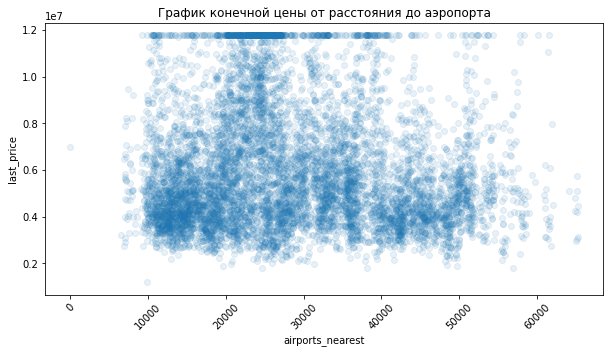

In [ ]:
df.groupby('airports_nearest')['last_price'].mean().plot(figsize = [10, 5], style='o', alpha=0.1, rot=45, ylabel='last_price', title = 'График конечной цены от расстояния до аэропорта').legend = False

In [ ]:
df['airports_nearest'].corr(df['last_price'])

-0.044928844608720576

**Наблюдаем низкий коэффициент корреляции расстояния до аэропорта относительно конечной цены**

**По графику мы видим что есть пиковое значение находится в диапазоне (23604.0, 31458.0], учитывая низкий каэффициент корреляции делаем вывод что нет непосредственного влияния на цену**

### График цены от расстояния до парка

In [ ]:
df['parks_nearest_category'] = pd.qcut(df['parks_nearest'], 5)
df.groupby('parks_nearest_category')['last_price'].agg(['count', 'mean'])

,count,mean
parks_nearest_category,,
"(0.999, 243.0]",1611,6.921676e+06
"(243.0, 392.0]",1616,6.579121e+06
"(392.0, 512.0]",1609,6.810568e+06
"(512.0, 648.0]",1618,6.691347e+06
"(648.0, 1098.0]",1591,6.841141e+06


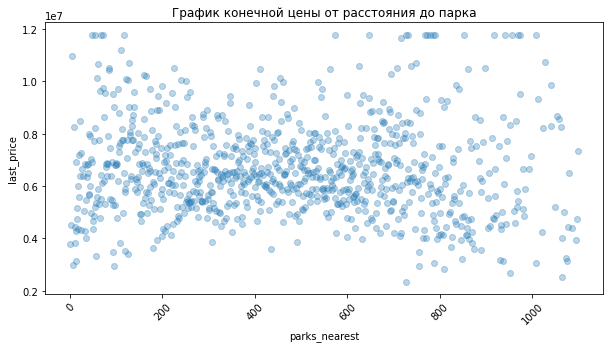

In [ ]:
df.groupby('parks_nearest')['last_price'].mean().plot(figsize = [10, 5], style='o', alpha=0.3, rot=45, ylabel='last_price', title = 'График конечной цены от расстояния до парка').legend = False

In [ ]:
df['parks_nearest'].corr(df['last_price'])

0.003429094164463668

**Наблюдаем низкий коэффициент корреляции расстояния до парка относительно конечной цены**

**По графику мы видим небольшуй взаимосвязь того что чем ближе квартира находится к парку тем выше цена, учитывая низкий коэффициент корреляции делаем вывод что нет непосредственного влияния на цену**

### График цены от даты публикации о продаже

In [ ]:
df['first_day_exposition_category'] = pd.qcut(df['first_day_exposition'], 5)
df.groupby('first_day_exposition_category')['last_price'].agg(['count', 'mean'])

,count,mean
first_day_exposition_category,,
"(2014-11-26 23:59:59.999999999, 2017-02-18 09:36:00]",4711,5.726842e+06
"(2017-02-18 09:36:00, 2017-10-10]",4729,5.409376e+06
"(2017-10-10, 2018-02-28]",4720,5.185473e+06
"(2018-02-28, 2018-10-08]",4718,5.259188e+06
"(2018-10-08, 2019-05-03]",4675,5.588830e+06


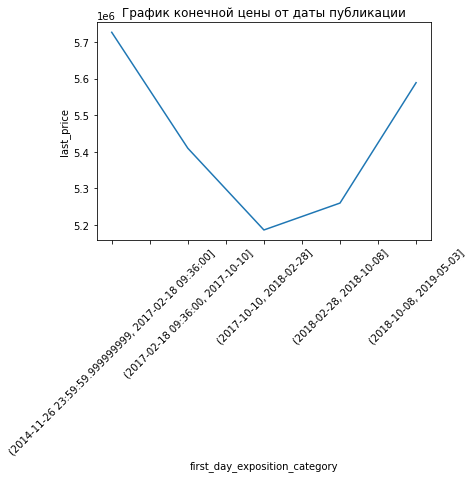

In [ ]:
df.groupby('first_day_exposition_category')['last_price'].mean().plot(rot=45, ylabel='last_price', title = 'График конечной цены от даты публикации').legend = False

**Мы видим спад цены относительно даты публикации от 2014-2018 года, затем наблюдаем рост до 2019 года. Есть предположение того что это связанно с внутриэкономическими событиями**

### График цены от дня недели публикации

In [ ]:
df.groupby('weekday')['last_price'].agg(['count', 'mean'])

,count,mean
weekday,,
0,3591,5.443119e+06
1,4163,5.473285e+06
2,3944,5.491092e+06
3,4271,5.518650e+06
4,3982,5.372711e+06
5,1919,5.270860e+06
6,1683,5.293342e+06


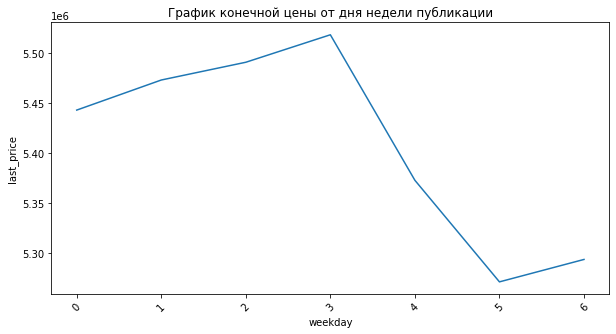

In [ ]:
df.groupby('weekday')['last_price'].mean().plot(figsize = [10, 5], rot=45, ylabel='last_price', title = 'График конечной цены от дня недели публикации').legend = False

**По графику мы видим что в будние дни недели публиковались квартиры дороже чем в выходные дни, но учитывая масштабирование графика делаем вывод что нет непосредственного влияния на цену**

### График цены от месяца публикации

In [ ]:
df.groupby('month')['last_price'].agg(['count', 'mean'])

,count,mean
month,,
1,1494,5.458975e+06
2,2628,5.419580e+06
3,2568,5.385376e+06
4,2350,5.508355e+06
5,1260,5.406836e+06
6,1750,5.242682e+06
7,1688,5.468389e+06
8,1739,5.418310e+06
9,1973,5.567718e+06


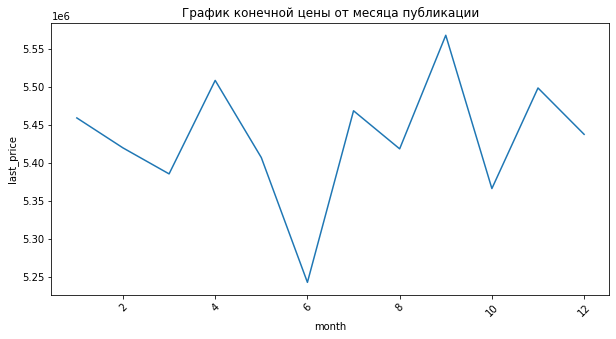

In [ ]:
df.groupby('month')['last_price'].mean().plot(figsize = [10, 5], rot=45, ylabel='last_price', title = 'График конечной цены от месяца публикации').legend = False

**По графику мы видим есть просатка по цене в июне, но учитывая масштабирование графика делаем вывод что нет непосредственного влияния на цену**

### График цены от года публикации

In [ ]:
df.groupby('year')['last_price'].agg(['count', 'mean'])

,count,mean
year,,
2014,137,7.881414e+06
2015,1184,6.208168e+06
2016,2761,5.459428e+06
2017,8157,5.356207e+06
2018,8476,5.263567e+06
2019,2838,5.696927e+06


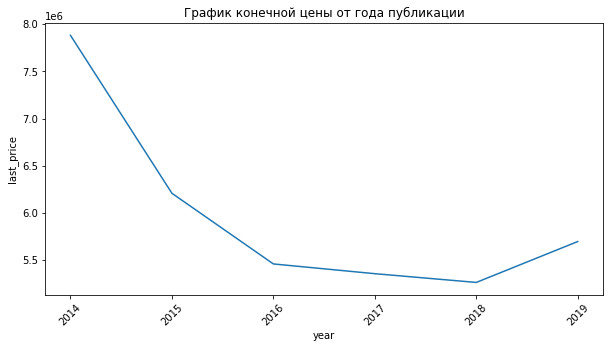

In [ ]:
df.groupby('year')['last_price'].mean().plot(figsize = [10, 5], rot=45, ylabel='last_price', title = 'График конечной цены от года публикации').legend = False

**Мы видим спад цены относительно даты публикации от 2014-2018 года, затем наблюдаем рост до 2019 года. Есть предположение того что это связанно с внутриэкономическими событиями**

### График цены от того сколько дней было размещено объявление

In [ ]:
df['days_exposition_category'] = pd.qcut(df['days_exposition'], 5)
df.groupby('days_exposition_category')['last_price'].agg(['count', 'mean'])

,count,mean
days_exposition_category,,
"(0.999, 35.0]",4198,5.030534e+06
"(35.0, 67.0]",4004,4.687443e+06
"(67.0, 135.0]",4073,5.446121e+06
"(135.0, 287.0]",4058,5.386047e+06
"(287.0, 512.5]",4083,5.897903e+06


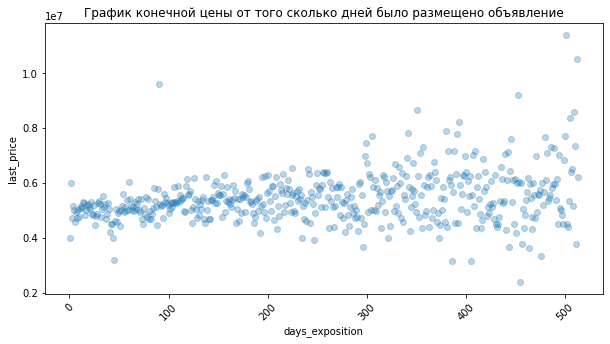

In [ ]:
df.groupby('days_exposition')['last_price'].mean().plot(figsize = [10, 5], style='o', alpha=0.3, rot=45, ylabel='last_price', title = 'График конечной цены от того сколько дней было размещено объявление').legend = False

In [ ]:
df['days_exposition'].corr(df['last_price'])

0.13471518608254854

**Наблюдаем низкий коэффициент корреляции от того сколько дней было размещено объявление относительно конечной цены**

**Не наблюдаем четкого тренда взаимосвязи цены от того сколько дней было размещено объявление, учитывая низкий коэффициент корреляции делаем вывод что нет непосредственного влияния на цену**

### Изучаем данные по days_exposition
**возьмем переменную days_exposition_category поделенную на 5 (0.2, 0.4, 0.6, 0,8 по куантилям) категорий и будем принимать крайние значения 'быстрыми' и 'меделенными' продажами: медленные продажи (куантиль > 0.8), нормальные продажи(0.2 < куантиль < 0.8), быстрые продажи(куантиль < 0.2) и посмотрим на их значения**

In [ ]:
df.groupby('days_exposition_category')['last_price'].count()

days_exposition_category
(0.999, 35.0]     4198
(35.0, 67.0]      4004
(67.0, 135.0]     4073
(135.0, 287.0]    4058
(287.0, 512.5]    4083
Name: last_price, dtype: int64

**Обычно продажа квартиры занимает от 35 до 287 дней, те что ниже 35 дней принимаем за быстрые продажи, что выше 287 дней считаем долгими продажами**

### Задание:
**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

**Для матрицы корреляций создадим сводную таблицу со значениями:общей площади, жилой площади, площади кухни, количество комнат, типа этажа, даты размещения (день недели, месяц, год)**

**Создаем промежуточную переменную 'id' для матрицы корреляций**

In [ ]:
new_column_id = []
for i in range(len(df)):
    new_column_id.append(i)
df['id'] = new_column_id

In [ ]:
last_price_multi = df.pivot_table(index='id', values=['last_price', 'weekday','month','year', 'floor', 'rooms', 'kitchen_area', 'total_area'], aggfunc='mean')
last_price_multi.corr()

,floor,kitchen_area,last_price,month,rooms,total_area,weekday,year
floor,1.000000,0.176649,0.093919,0.020883,-0.155477,-0.028471,0.011751,0.004750
kitchen_area,0.176649,1.000000,0.652349,0.015091,0.294812,0.632478,-0.011355,-0.067047
last_price,0.093919,0.652349,1.000000,0.004412,0.562602,0.810350,-0.018449,-0.040604
month,0.020883,0.015091,0.004412,1.000000,-0.002696,0.007928,0.012303,-0.269405
rooms,-0.155477,0.294812,0.562602,-0.002696,1.000000,0.817387,-0.004716,-0.057350
total_area,-0.028471,0.632478,0.810350,0.007928,0.817387,1.000000,-0.012981,-0.089467
weekday,0.011751,-0.011355,-0.018449,0.012303,-0.004716,-0.012981,1.000000,-0.003405
year,0.004750,-0.067047,-0.040604,-0.269405,-0.057350,-0.089467,-0.003405,1.000000


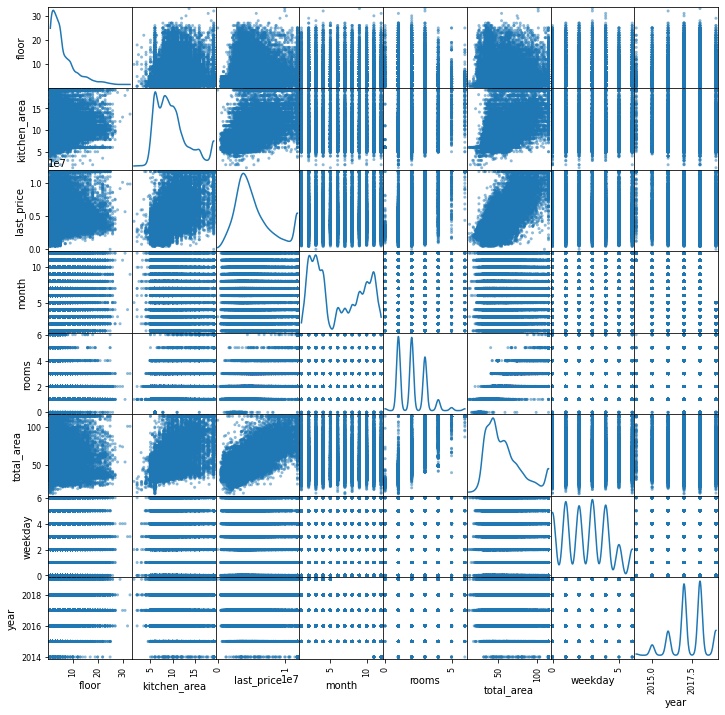

In [ ]:
matrix = pd.plotting.scatter_matrix(last_price_multi, figsize=(12, 12), diagonal='kde')

**Промежуточный вывод**

**Общая площадь - линейная зависимость, чем больше квадратура, тем больше цена**

**Жилплощадь - линейная зависимость, чем больше квадратура, тем больше цена**

**площади кухни - линейная зависимость, чем больше квадратура, тем больше цена**

**Количество комнат - экспоненциальный рост, зависимость от цены есть**

**На каком этаже - цены имеют нисходящий тренд в квартирах на первом этаже, но незначительно, в остальныз случаях зависимость несущественная**

**Дата Размещения - день и неделя не влияют на цену, а вот год в котором была выставлена квартира — есть прямая зависимость**

### Задание:
**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

**Создадим сводную таблицу названий населенных пунктов от цены за один квадратный метр, отсортируем по количеству наблюдений, оставим 10 населенных пунктов у которых больше всего наблюдений и отсортируем их в порядке убывания по среднему значению**

In [ ]:
the_most_expensive_apart = df.groupby('locality_name')['price_of_one_meter'].agg(['mean', 'count', 'median']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
the_most_expensive_apart

,mean,count,median
locality_name,,,
санкт-петербург,107013.121364,15591,103063.457330
пушкин,101126.923834,369,100000.000000
кудрово,95215.583542,470,95555.311677
парголово,90267.475088,327,91642.857143
мурино,86041.116064,586,86250.377687
шушары,78585.392731,439,76829.268293
колпино,75407.855250,338,74723.748474
гатчина,68773.388679,307,67924.528302
всеволожск,67901.326388,398,65789.473684


### Выделим населенные пункты
**с самой высокой стоимостью за кв. м**

In [ ]:
the_most_expensive_apart.sort_values(by = 'median', ascending=False).head(5)

,mean,count,median
locality_name,,,
санкт-петербург,107013.121364,15591,103063.457330
пушкин,101126.923834,369,100000.000000
кудрово,95215.583542,470,95555.311677
парголово,90267.475088,327,91642.857143
мурино,86041.116064,586,86250.377687


### Выделим населенные пункты
**с низкой высокой стоимостью за кв. м**

In [ ]:
the_most_expensive_apart.sort_values(by = 'median', ascending=False).tail(5)

,mean,count,median
locality_name,,,
шушары,78585.392731,439,76829.268293
колпино,75407.855250,338,74723.748474
гатчина,68773.388679,307,67924.528302
всеволожск,67901.326388,398,65789.473684
выборг,58313.613416,237,58158.319871


### Задание:
**Как стоимость объектов зависит от расстояния до центра города Санкт-Петербург**

**Создаем сводную таблицу по населенному пункту Санкт-Петербург со значениями растояния до центра в км. и ценой**

In [ ]:
df_one_km = df.loc[df['locality_name'] == 'санкт-петербург', ['cityCenters_nearest_km', 'last_price']]
df_one_km.head()

,cityCenters_nearest_km,last_price
0,16.0,11775000.0
2,13.9,5196000.0
3,6.8,11775000.0
4,8.1,10000000.0
7,11.6,7915000.0


**Добавим в сводную таблицу цену за 1км до цента**

In [ ]:
df_one_km['one_km_price'] = df_one_km['last_price']/df_one_km['cityCenters_nearest_km']
df_one_km.sort_values(by='one_km_price').head()


,cityCenters_nearest_km,last_price,one_km_price
8745,9.2,12190.0,1325.000000
5922,26.9,2250000.0,83643.122677
17849,15.9,1400000.0,88050.314465
19631,22.9,2080000.0,90829.694323
12080,26.9,2450000.0,91078.066914


**Опишем как расстояние до центра влияет на цену за 1км, для этого построим график**

In [ ]:
df_one_km['one_km_price'].corr(df['cityCenters_nearest_km'])

-0.5110660054678614

**Наблюдаем средний коэффициент корреляции цены за 1км относительно расстояния до центра**

In [ ]:
df_one_km['cityCenters_nearest_km_category'] = pd.qcut(df_one_km['cityCenters_nearest_km'], 5)

In [ ]:
df_one_km.groupby('cityCenters_nearest_km_category')['one_km_price'].agg(['mean','median','count'])

,mean,median,count
cityCenters_nearest_km_category,,,
"(0.199, 6.6]",2.951822e+06,2.100000e+06,3167
"(6.6, 11.2]",7.270792e+05,6.034483e+05,3131
"(11.2, 13.3]",4.666137e+05,4.105689e+05,3145
"(13.3, 15.5]",3.859395e+05,3.377483e+05,3104
"(15.5, 26.9]",2.949673e+05,2.664633e+05,3044


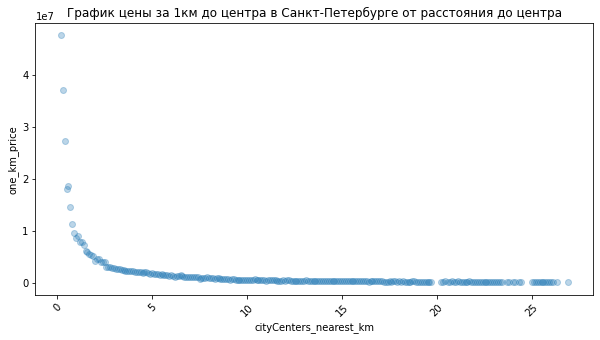

In [ ]:
df_one_km.groupby('cityCenters_nearest_km')['one_km_price'].mean().plot(figsize = [10, 5], style='o', alpha=0.3, rot=45, ylabel='one_km_price', title = 'График цены за 1км до центра в Санкт-Петербурге от расстояния до центра').legend = False

**По графику мы видим что присутствует тренд линейной зависимости и делаем вывод что чем ближе квартира находится к центру Санкт-Петербург тем выше стоимость каждого км. до центра**

## Общий вывод

**В проделанной работе есть промежуточные выводы,
в общем выводе я бы хотел обобщить их и подвести итог по работе с предоставленным датасетом**


<h3>Пропуски и дубликаты</h3>

**Пропуски были проанализированны с помощью гистограм для визуализации, и методотом corr - проведена аналитическая работа**
**можно выделить что пропуски были чаще из-за некорректной работы алгоритма по сбору информации(как в случае с высотой потолка), так и возможно отсутствии стандартизации по заполнении данных(как в случае с названием поселков)**


<h3>Исследование данных</h3>

**Был проведен анализ колонок, описаны, а также приведены графики по ключевым из них. Выбивающиеся значения были исключены из выборки, чтобы можно было провести корректный анализ**

**Время продажи квартир был категоризирован на**
**быстрые(меньше 35 дней), обычные(35 до 287 дней) и медленные(свыше 287 дней)**

**Выделили основные переменные влияющие на цены**

**Основными оказались:**

**-Общая площадь, Жилплощадь, площади кухни, Количество комнат, год размещения**

**-Относительно возложенных на меня заданий была сделана следующая работа**

**-Посчитана цена одного кв.м в топ 10 городов**

**-выделены топ 5 дорогих и топ 5 дешевых среди них**

**-дорогими(по цене 1 кв.м) оказались - санкт-петербург пушкин кудрово парголово мурино**

**-дешевыми - шушары колпино гатчина всеволожск выборг**

<h4>Основные наблюдения</h4>

**Чем больше площадь квартиры, тем выше цена**

**Чем больше площадь квартиры, тем выше цена**

**Чем больше цена за квадратный метр, тем выше цена**

**Чем выше доля жилой площади/площадь кухни, тем выше цена**

**Чем больше комнат, тем выше цена**

**На первом этаже квартира дешевле, чем на остальных**

**Чем ближе к центру, тем дороже квартира. В самом центре (< 1 км до центра) квартиры стоят на порядок дороже, чем на более удаленных.**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод